# Analyze traffic patterns for bioRxiv preprints

In [1]:
import pandas
import seaborn
import numpy

In [2]:
preprint_df = pandas.read_csv('data/01.preprints.tsv', sep='\t')
traffic_df = pandas.read_csv('data/01.preprint-traffic.tsv.xz', sep='\t', dtype={'months_since_journal': 'Int64'})

In [3]:
traffic_df = traffic_df.dropna()
traffic_df['preprint_download_ratio'] = traffic_df.preprint_downloads / (traffic_df.preprint_downloads + traffic_df.preprint_views)
traffic_df.head(2)

,rxivist_preprint_id,period,preprint_views,preprint_downloads,months_since_preprint,months_since_journal,preprint_download_ratio
7,387,2018-08,399,42,0,-3,0.095238
8,387,2018-09,75,38,1,-2,0.336283


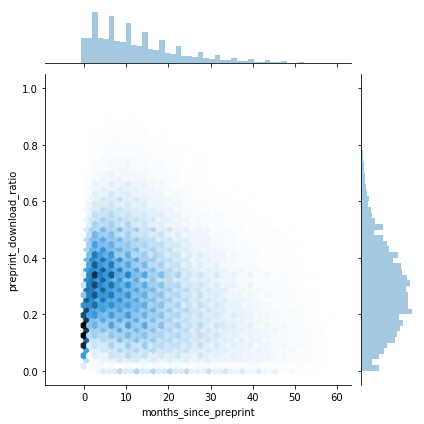

In [4]:
seaborn.jointplot(x='months_since_preprint', y="preprint_download_ratio", data=traffic_df, kind="hex")

In [5]:
# joint_grid = seaborn.jointplot(
#     x='months_since_journal',
#     y='preprint_download_ratio',
#     data=traffic_df.dropna().query("-10 <= months_since_journal <= 10"),
#     kind="hex",
#     xlim=(-10, 10),
# )

In [6]:
traffic_df.dropna().query("-10 <= months_since_journal <= 10").groupby('months_since_journal').preprint_download_ratio.median().map('{:.2%}'.format)

months_since_journal
-10    29.17%
-9     28.57%
-8     28.60%
-7     28.85%
-6     28.81%
-5     28.57%
-4     28.81%
-3     29.22%
-2     29.63%
-1     30.26%
 0     31.45%
 1     31.17%
 2     30.91%
 3     30.86%
 4     30.16%
 5     30.23%
 6     29.27%
 7     29.17%
 8     28.57%
 9     28.30%
 10    27.78%
Name: preprint_download_ratio, dtype: object